## This Notebook scans some subreddits for interesting symbols (crypto and stocks), calculate the sentiment around it and plot the price to compare the sentiment with the behaviour of the price

In [1]:
from RedditSentimentAnalyzer import *
import configparser
import json
import time
from data import sentiment_data
#import nltk

In [2]:
#nltk.download('vader_lexicon')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
# Read reddit credentials from config file
config = configparser.ConfigParser()
config.read('../settings/reddit_keys.ini')

['../settings/reddit_keys.ini']

In [5]:
reddit = connect_reddit(json.loads(config['REDDIT']['REDDIT_CREDENTIALS']))

# Checking what is said in r/Wallstreetbets and comparing with the current price of each interesting stock Symbol

Number of posts checked 1
Number of comments analysed 0
Number of posts checked 11
Number of comments analysed 1038
It took 21.12 seconds to analyze 1198 comments in 11 posts in 1 subreddits.

Posts analyzed saved in titles

25 most mentioned tickers: 
NFLX: 49
GME: 10
TSLA: 7
FB: 3
GOOGL: 2
NVDA: 2
TWTR: 2
PE: 2
NBA: 2
TLRY: 1
DIS: 1
IBM: 1
NTNX: 1
TA: 1
ASML: 1
AMD: 1
SAVA: 1
ETSY: 1
GOOG: 1
AAPL: 1
SHOP: 1
SNAP: 1
GS: 1
BILL: 1
W: 1

Sentiment analysis of top picks at 20/04/2022 10:19
       Bearish  Neutral  Bullish  Total/Compound
NFLX     0.213    0.561    0.773          -0.046
TSLA     0.252    0.722    0.800          -0.146
FB       0.533    0.467    1.067          -0.226
GOOGL    0.100    0.633    0.800           0.125
NVDA     0.000    0.675    0.775           0.097
TWTR     0.083    0.917    1.083          -0.033
PE       0.562    0.250    1.125          -0.099
NBA      0.071    0.829    0.371          -0.034
TLRY     1.000    0.000    2.000          -0.718
IBM      0.000   

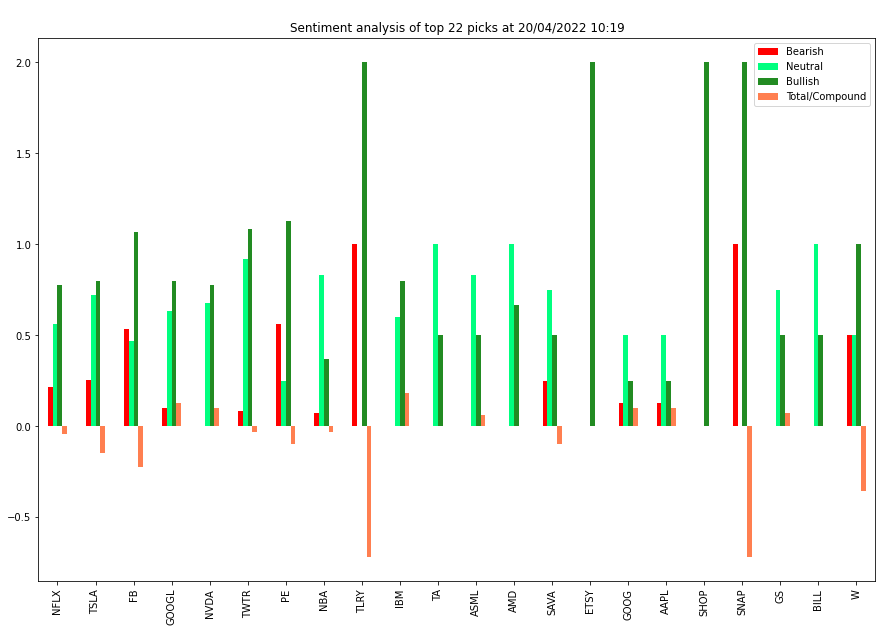

In [10]:
start_time = time.time()
posts, c_analyzed, tickers, titles, a_comments, picks, subs, picks_ayz = data_extractor(reddit,
                                                                                        subs            = ["wallstreetbets"],
                                                                                        list_of_symbols = sentiment_data.us,
                                                                                        blacklist_words = sentiment_data.blacklist,
                                                                                        post_flairs     = {'Daily Discussion', 'Weekend Discussion', 'Discussion', 'DD'},
                                                                                        limit           = 1000)

symbols, times, top = print_helper(tickers, picks, c_analyzed, posts, subs, titles, time, start_time)
scores = sentiment_analysis(picks_ayz, a_comments, symbols)
interesting_symbols = select_interesting_symbols(scores)
visualization(picks_ayz, interesting_symbols.T, picks, times, top, tree_view=False)

# Same than before but focusing on cryptos

In [13]:
all_cryptos = pd.read_csv("../data/list_of_all_cryptos.csv")
all_cryptos_symbols = all_cryptos[all_cryptos.Symbol.notna()].Symbol.to_list()

Number of posts checked 1
Number of comments analysed 0
Number of posts checked 11
Number of comments analysed 1395
It took 28.04 seconds to analyze 2161 comments in 17 posts in 1 subreddits.

Posts analyzed saved in titles

25 most mentioned tickers: 
ETH: 5
NFT: 5
BTC: 4
RAMP: 1
ALGO: 1
DAI: 1
USDC: 1
XRP: 1
BNB: 1
BUSD: 1
UST: 1
ADA: 1
CKB: 1
ID: 1

Sentiment analysis of top picks at 20/04/2022 10:58
     Bearish Neutral Bullish Total/Compound
ETH    0.035   0.843   0.194          0.034
NFT    0.107   0.789   0.129         -0.013
BTC    0.103   0.762   0.361          0.025
RAMP   0.145   0.697   0.014         -0.008
ALGO   0.145   0.697   0.014         -0.008
DAI    0.022   0.913   0.043          0.021
USDC   0.000   0.950   0.100          0.023
XRP    0.000   0.842   0.105          0.068
BNB    0.045   0.727   0.227          0.067
BUSD   0.031   0.875   0.125          0.023
UST    0.031   0.875   0.125          0.023
ADA    0.057   0.843   0.057          0.012
CKB    0.057   0.843 

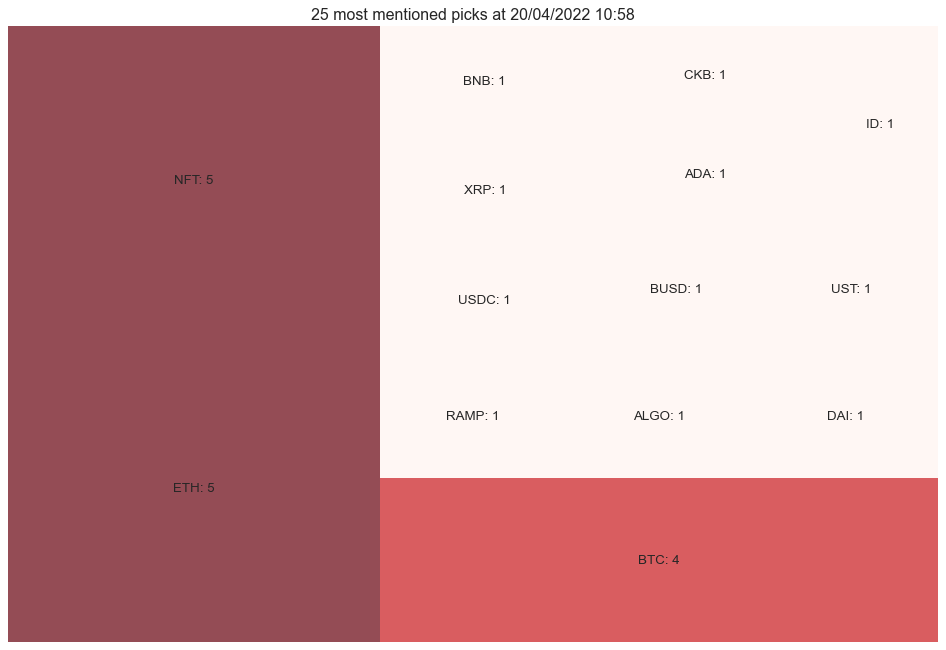

      Bearish  Neutral  Bullish  Total/Compound
ETH     0.035    0.843    0.194           0.034
NFT     0.107    0.789    0.129          -0.013
BTC     0.103    0.762    0.361           0.025
RAMP    0.145    0.697    0.014          -0.008
ALGO    0.145    0.697    0.014          -0.008
DAI     0.022    0.913    0.043           0.021
USDC    0.000    0.950    0.100           0.023
XRP     0.000    0.842    0.105           0.068
BNB     0.045    0.727    0.227           0.067
BUSD    0.031    0.875    0.125           0.023
UST     0.031    0.875    0.125           0.023
ADA     0.057    0.843    0.057           0.012
CKB     0.057    0.843    0.057           0.012
ID      0.025    0.900    0.075           0.011


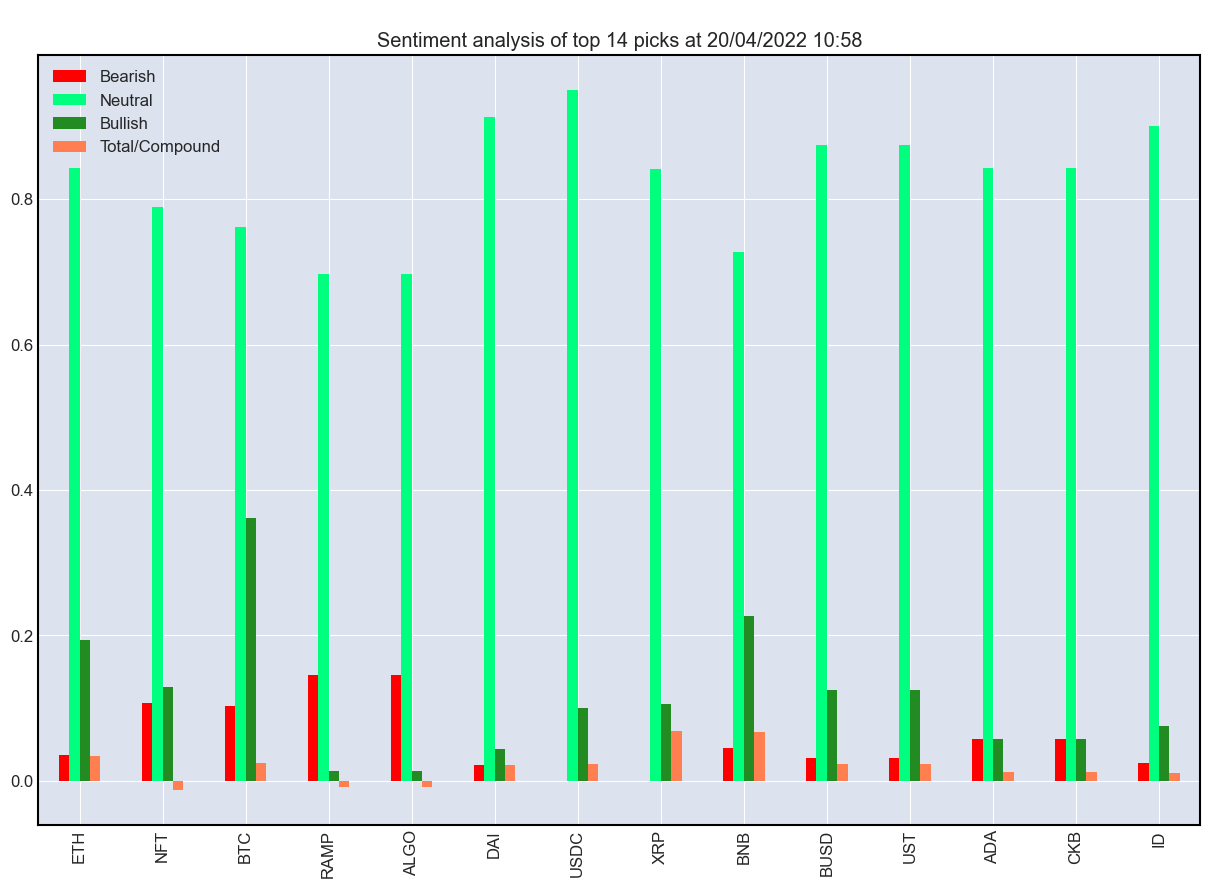


Sentiment analysis of top picks at 20/04/2022 10:58
      Bearish  Neutral  Bullish  Total/Compound
NFT     0.107    0.789    0.129          -0.013
BTC     0.103    0.762    0.361           0.025
RAMP    0.145    0.697    0.014          -0.008
ALGO    0.145    0.697    0.014          -0.008
      Bearish  Neutral  Bullish  Total/Compound
NFT     0.107    0.789    0.129          -0.013
BTC     0.103    0.762    0.361           0.025
RAMP    0.145    0.697    0.014          -0.008
ALGO    0.145    0.697    0.014          -0.008


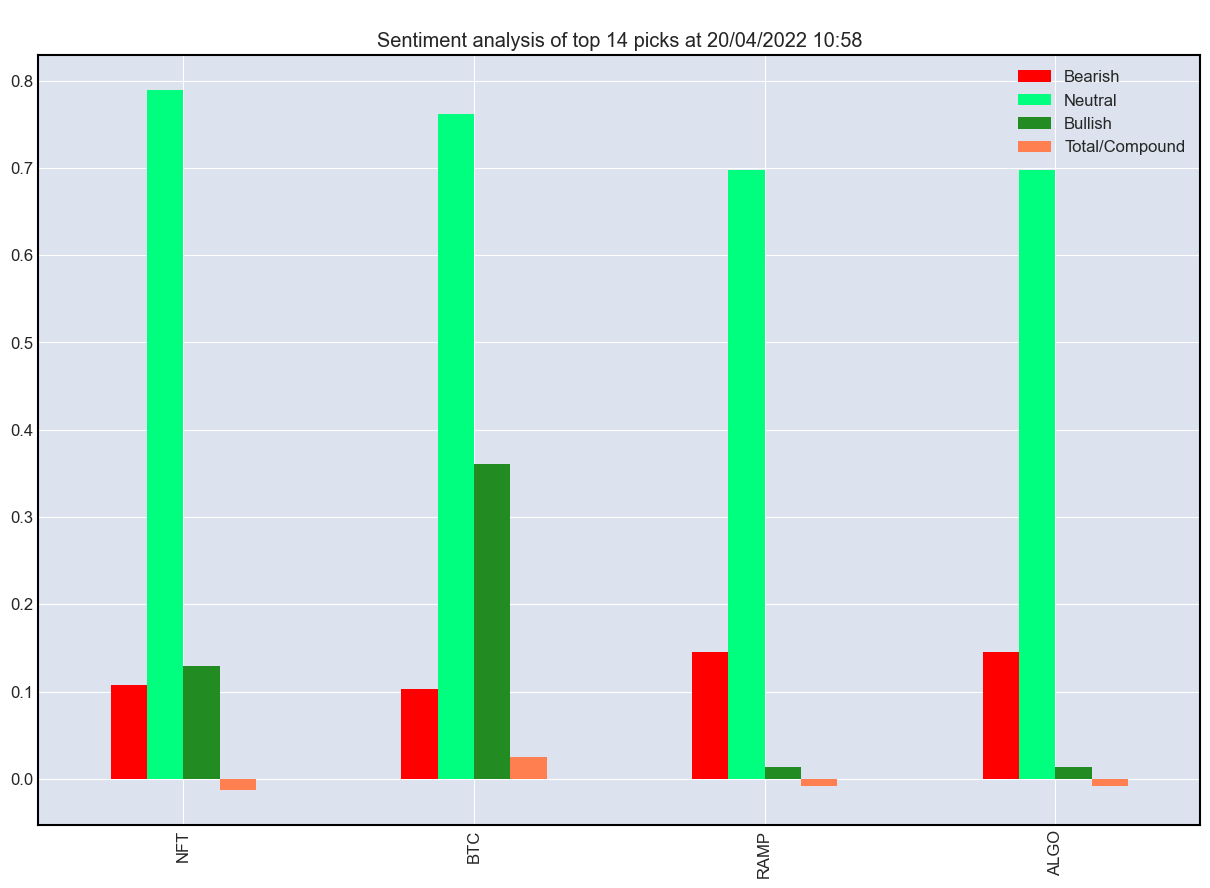

[*********************100%***********************]  1 of 1 completed


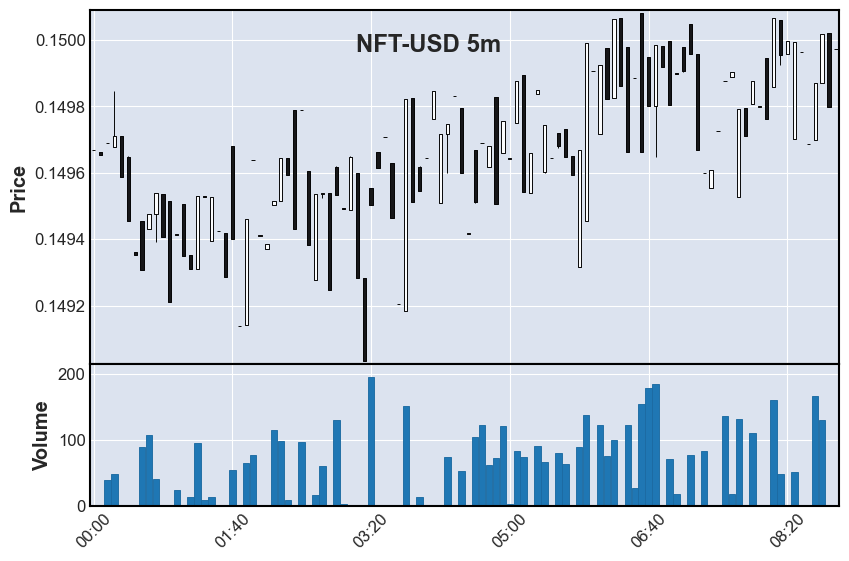

[*********************100%***********************]  1 of 1 completed


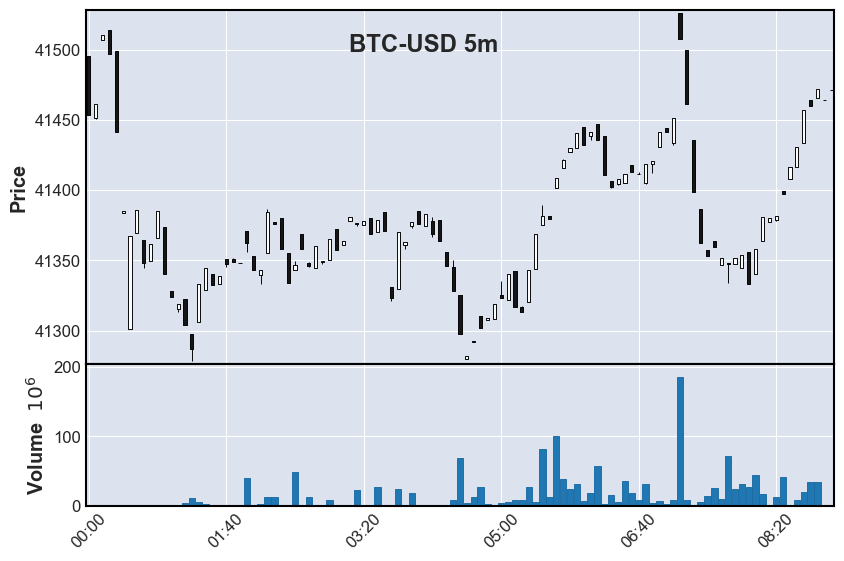

[*********************100%***********************]  1 of 1 completed


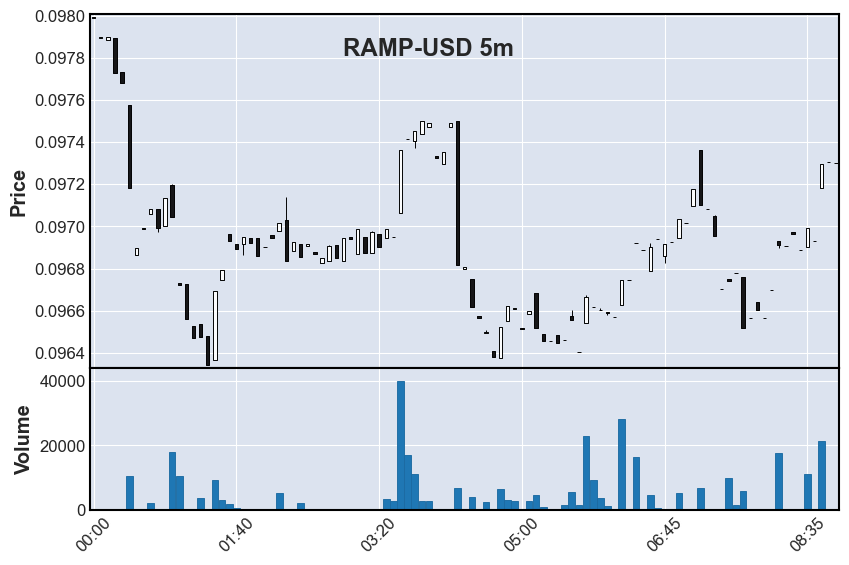

[*********************100%***********************]  1 of 1 completed


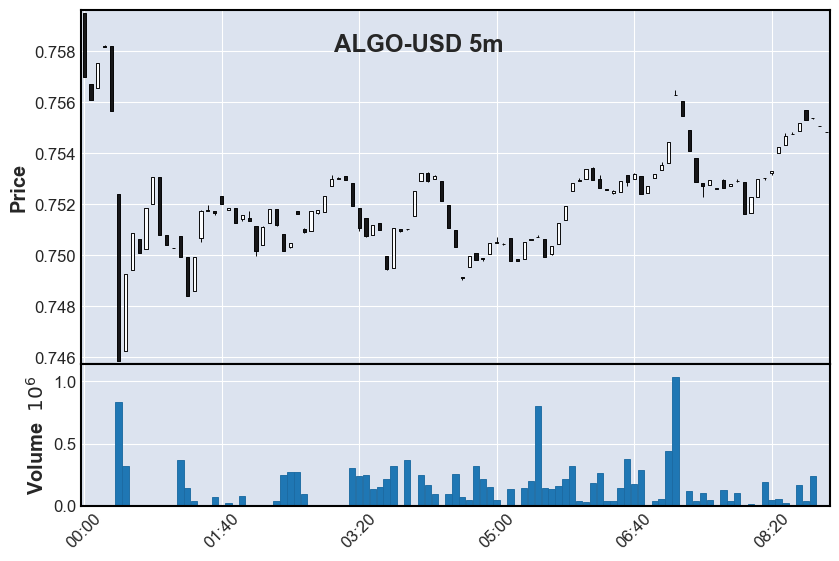

'./cryptos_sentiment/200422-1004'

In [23]:
start_time = time.time()
blacklisted = sentiment_data.blacklist.union({'TRADE', 'TIME'})
post_flairs = {'ANALYSIS', 'MOONS', 'ADVICE', 'PERSPECTIVE', 'DISCUSSION', 'EXCHANGE', "DEBATE", "MARKETS", "SPECULATION"}
posts, c_analyzed, tickers, titles, a_comments, picks, subs, picks_ayz = data_extractor(reddit,
                                                                                        subs            = ["CryptoCurrency"],
                                                                                        list_of_symbols = all_cryptos_symbols,
                                                                                        blacklist_words = blacklisted,
                                                                                        post_flairs     = post_flairs, #  {'ANALYSIS', 'MOONS', 'ADVICE', 'PERSPECTIVE', 'DISCUSSION', 'EXCHANGE'})
                                                                                        limit           = 0)
symbols, times, top = print_helper(tickers, picks, c_analyzed, posts, subs, titles, time, start_time)
scores = sentiment_analysis(picks_ayz, a_comments, symbols)
visualization(picks_ayz, scores, picks, times, top, tree_view=True)
#out_1, out_2, out_3 = select_outliers_from_scores(scores)
interesting_symbols = select_interesting_symbols(scores)
#visualization(picks_ayz, out_3.astype(str).T.to_dict(), picks, times, top, tree_view=False)
visualization(picks_ayz, interesting_symbols.T, picks, times, top, tree_view=False)
#names_of_cryptos = [all_cryptos[all_cryptos.Symbol==x].Name.to_list()[0] for x in out_3.index.to_list()]
chart_of_crypto(interesting_symbols.index)

In [25]:
### Checking another set of post_flairs

Number of posts checked 1
Number of comments analysed 0
It took 3.34 seconds to analyze 83 comments in 2 posts in 1 subreddits.

Posts analyzed saved in titles

25 most mentioned tickers: 
NFT: 3
ETH: 1

Sentiment analysis of top picks at 20/04/2022 11:00
    Bearish Neutral Bullish Total/Compound
NFT   0.106   0.772   0.143          0.001
ETH   0.082   0.788   0.082          0.013


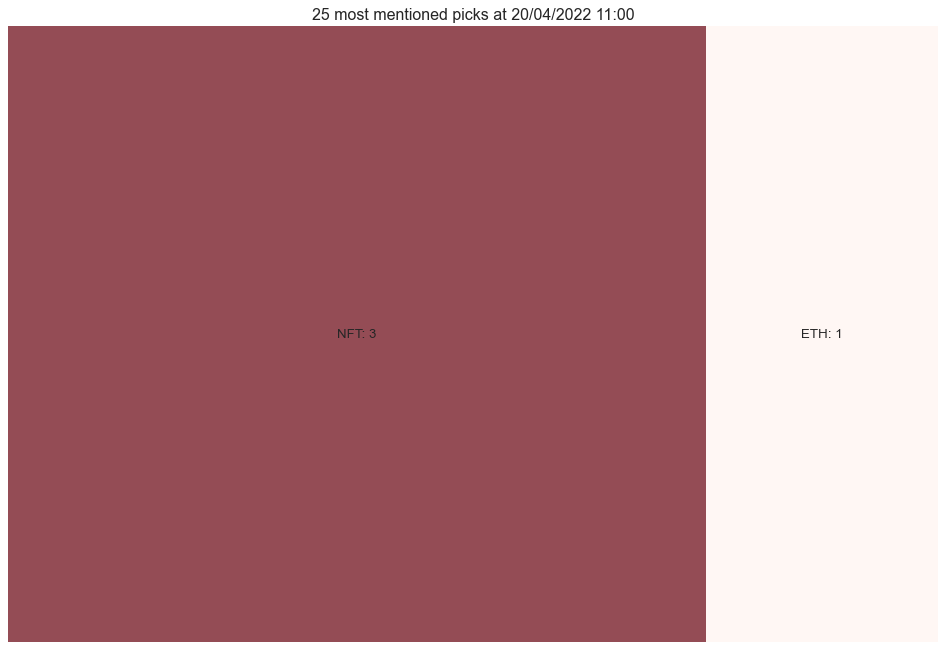

     Bearish  Neutral  Bullish  Total/Compound
NFT    0.106    0.772    0.143           0.001
ETH    0.082    0.788    0.082           0.013


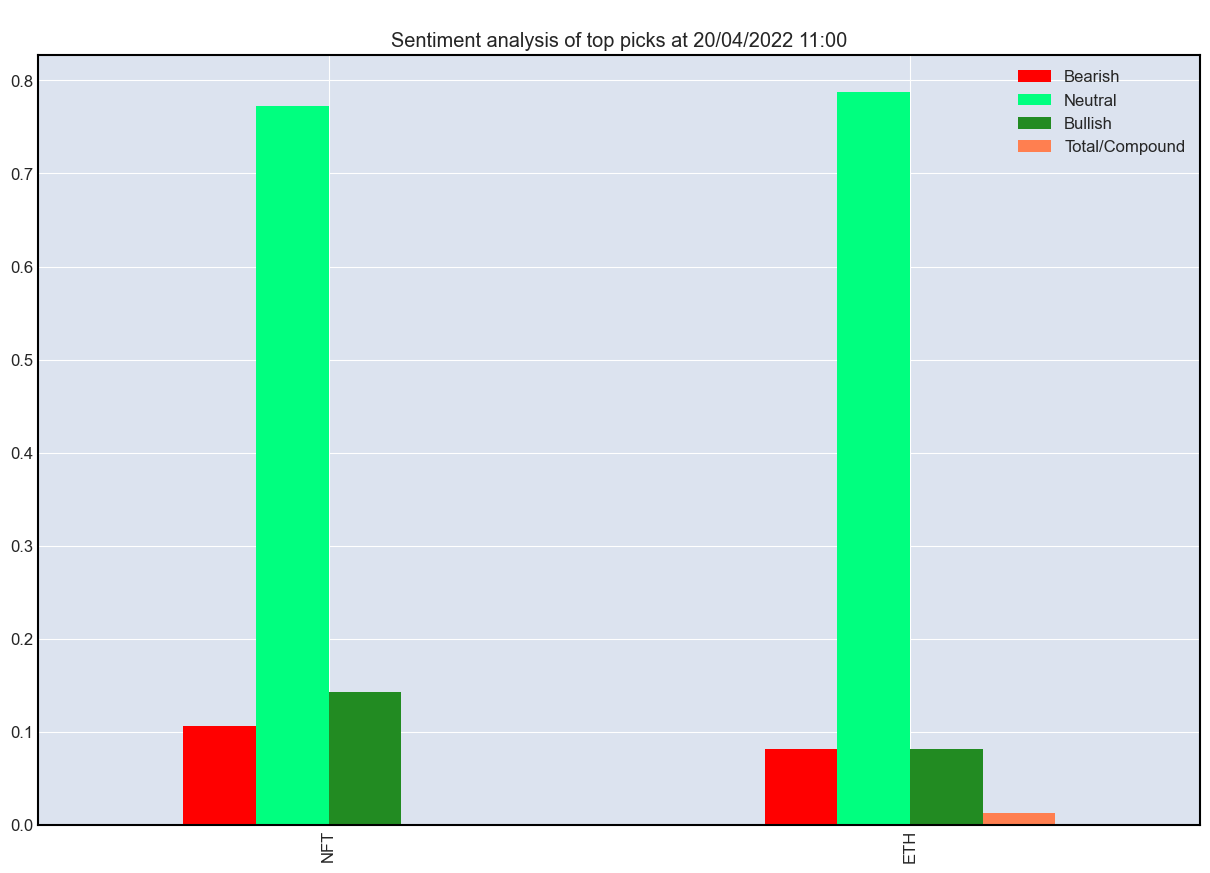


Sentiment analysis of top picks at 20/04/2022 11:00
     Bearish  Neutral  Bullish  Total/Compound
NFT    0.106    0.772    0.143           0.001
     Bearish  Neutral  Bullish  Total/Compound
NFT    0.106    0.772    0.143           0.001


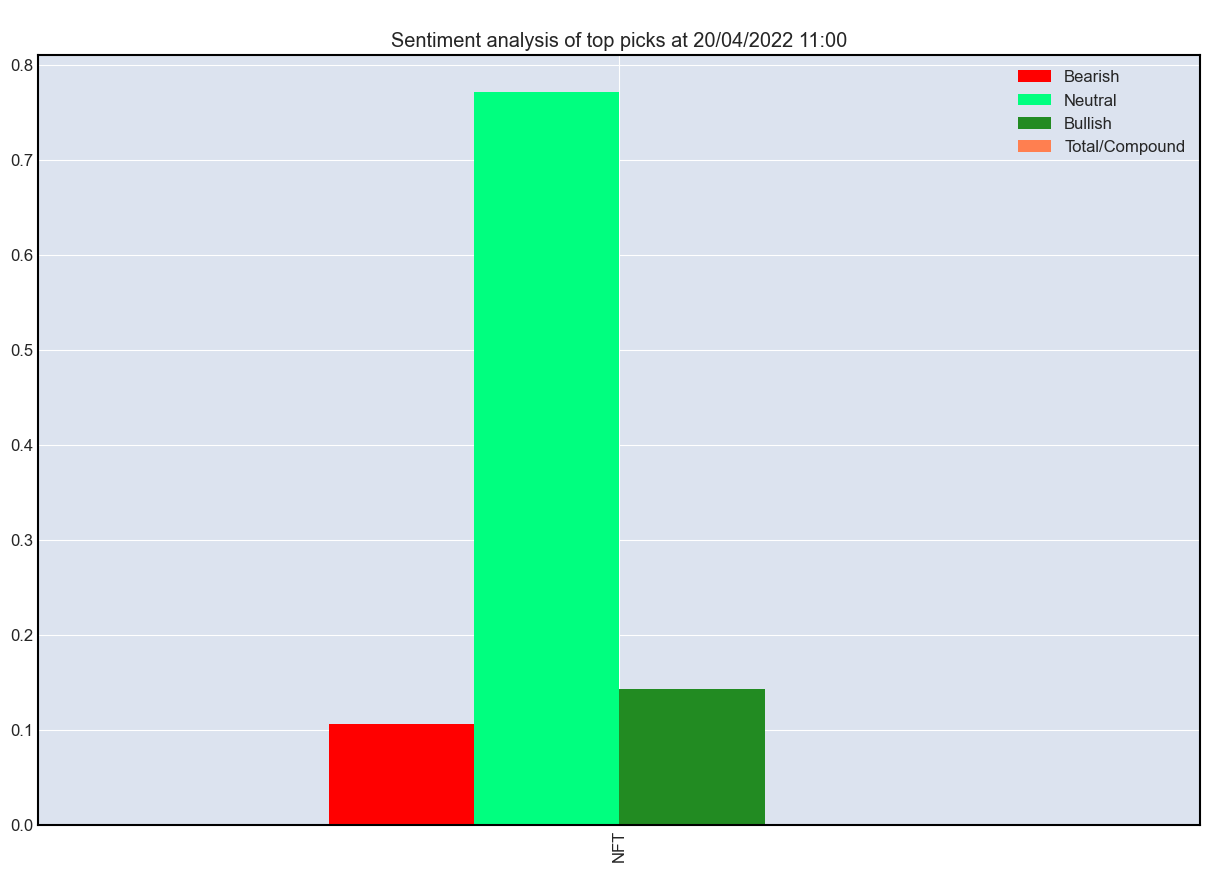

[*********************100%***********************]  1 of 1 completed


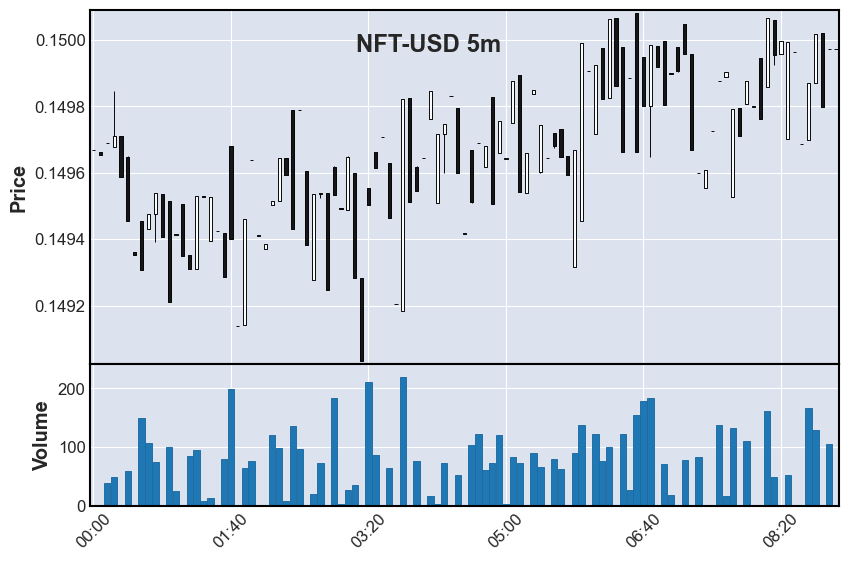

'./cryptos_sentiment/200422-1104'

In [27]:
start_time = time.time()
blacklisted = sentiment_data.blacklist.union({'TRADE', 'TIME'})
post_flairs = {'ANALYSIS', 'EXCHANGE', "MARKETS", "SPECULATION", "WARNING"}
posts, c_analyzed, tickers, titles, a_comments, picks, subs, picks_ayz = data_extractor(reddit,
                                                                                        subs            = ["CryptoCurrency"],
                                                                                        list_of_symbols = all_cryptos_symbols,
                                                                                        blacklist_words = blacklisted,
                                                                                        post_flairs     = post_flairs,
                                                                                        limit           = 0)

symbols, times, top = print_helper(tickers, picks, c_analyzed, posts, subs, titles, time, start_time)
scores = sentiment_analysis(picks_ayz, a_comments, symbols)
visualization(picks_ayz, scores, picks, times, top, tree_view=True)
#out_1, out_2, out_3 = select_outliers_from_scores(scores)
interesting_symbols = select_interesting_symbols(scores)
#visualization(picks_ayz, out_3.astype(str).T.to_dict(), picks, times, top, tree_view=False)
visualization(picks_ayz, interesting_symbols.T, picks, times, top, tree_view=False)
#names_of_cryptos = [all_cryptos[all_cryptos.Symbol==x].Name.to_list()[0] for x in out_3.index.to_list()]
chart_of_crypto(interesting_symbols.index)